# **Audio Classification Project**

In this project, we focus on classifying urban sound clips into different categories using deep learning techniques. We utilize the UrbanSound8K dataset, which is a collection of 8,732 audio files of urban sounds categorized into 10 classes, including sounds like air conditioners, car horns, children playing, and more. Each audio clip in the dataset is labeled with its corresponding sound class, providing a robust dataset for training and testing audio classification models.

The approach taken in this project involves several key steps:
1. **Data Exploration and Visualization**: We begin by exploring the dataset and visualizing the distribution of sound classes. This helps in understanding the data and identifying any potential biases.
2. **Feature Extraction**: We extract meaningful features from the audio signals that can be used by machine learning models. In this case, we use Mel-Frequency Cepstral Coefficients (MFCCs), which are widely recognized as effective features for audio classification tasks.
3. **Model Building**: We construct a deep learning model using a neural network architecture. The model is designed to learn patterns from the extracted features and accurately classify audio samples into their respective categories.
4. **Evaluation and Testing**: After training the model, we evaluate its performance on a test set to ensure it generalizes well to unseen data. Additionally, we test the model on example audio clips to assess its accuracy and reliability.


By the end of this project, we aim to achieve a model capable of accurately classifying a diverse range of urban sounds, demonstrating the effectiveness of deep learning techniques in audio analysis.

**Importing the Libraries**

We begin by importing the necessary libraries. These libraries are essential for data manipulation, visualization, audio processing, and building our machine learning model.

In [1]:
import numpy as np
import pandas as pd
import IPython.display as ipd
import librosa 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping


Suppress warnings for clean output.

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

We load the metadata of the UrbanSound8K dataset, which contains information about each audio file, such as the class label, fold number, and file name.

In [3]:
dt=pd.read_csv(r'D:\projects\Deep learning\Audio classification\UrbanSound8K\metadata\UrbanSound8K.csv')

In [4]:
dt.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

**Exploratory Data Analysis (EDA)**

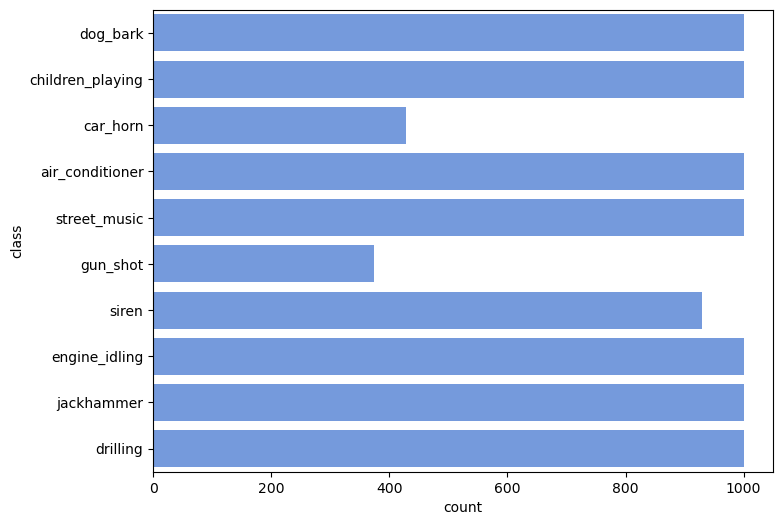

In [5]:
plt.figure(figsize=(8,6))
ax=sns.countplot(y=dt['class'],data=dt,color="cornflowerblue")

Now, let us take an example of audio data from each class to learn about the characteristics of that class.

<function matplotlib.pyplot.show(close=None, block=None)>

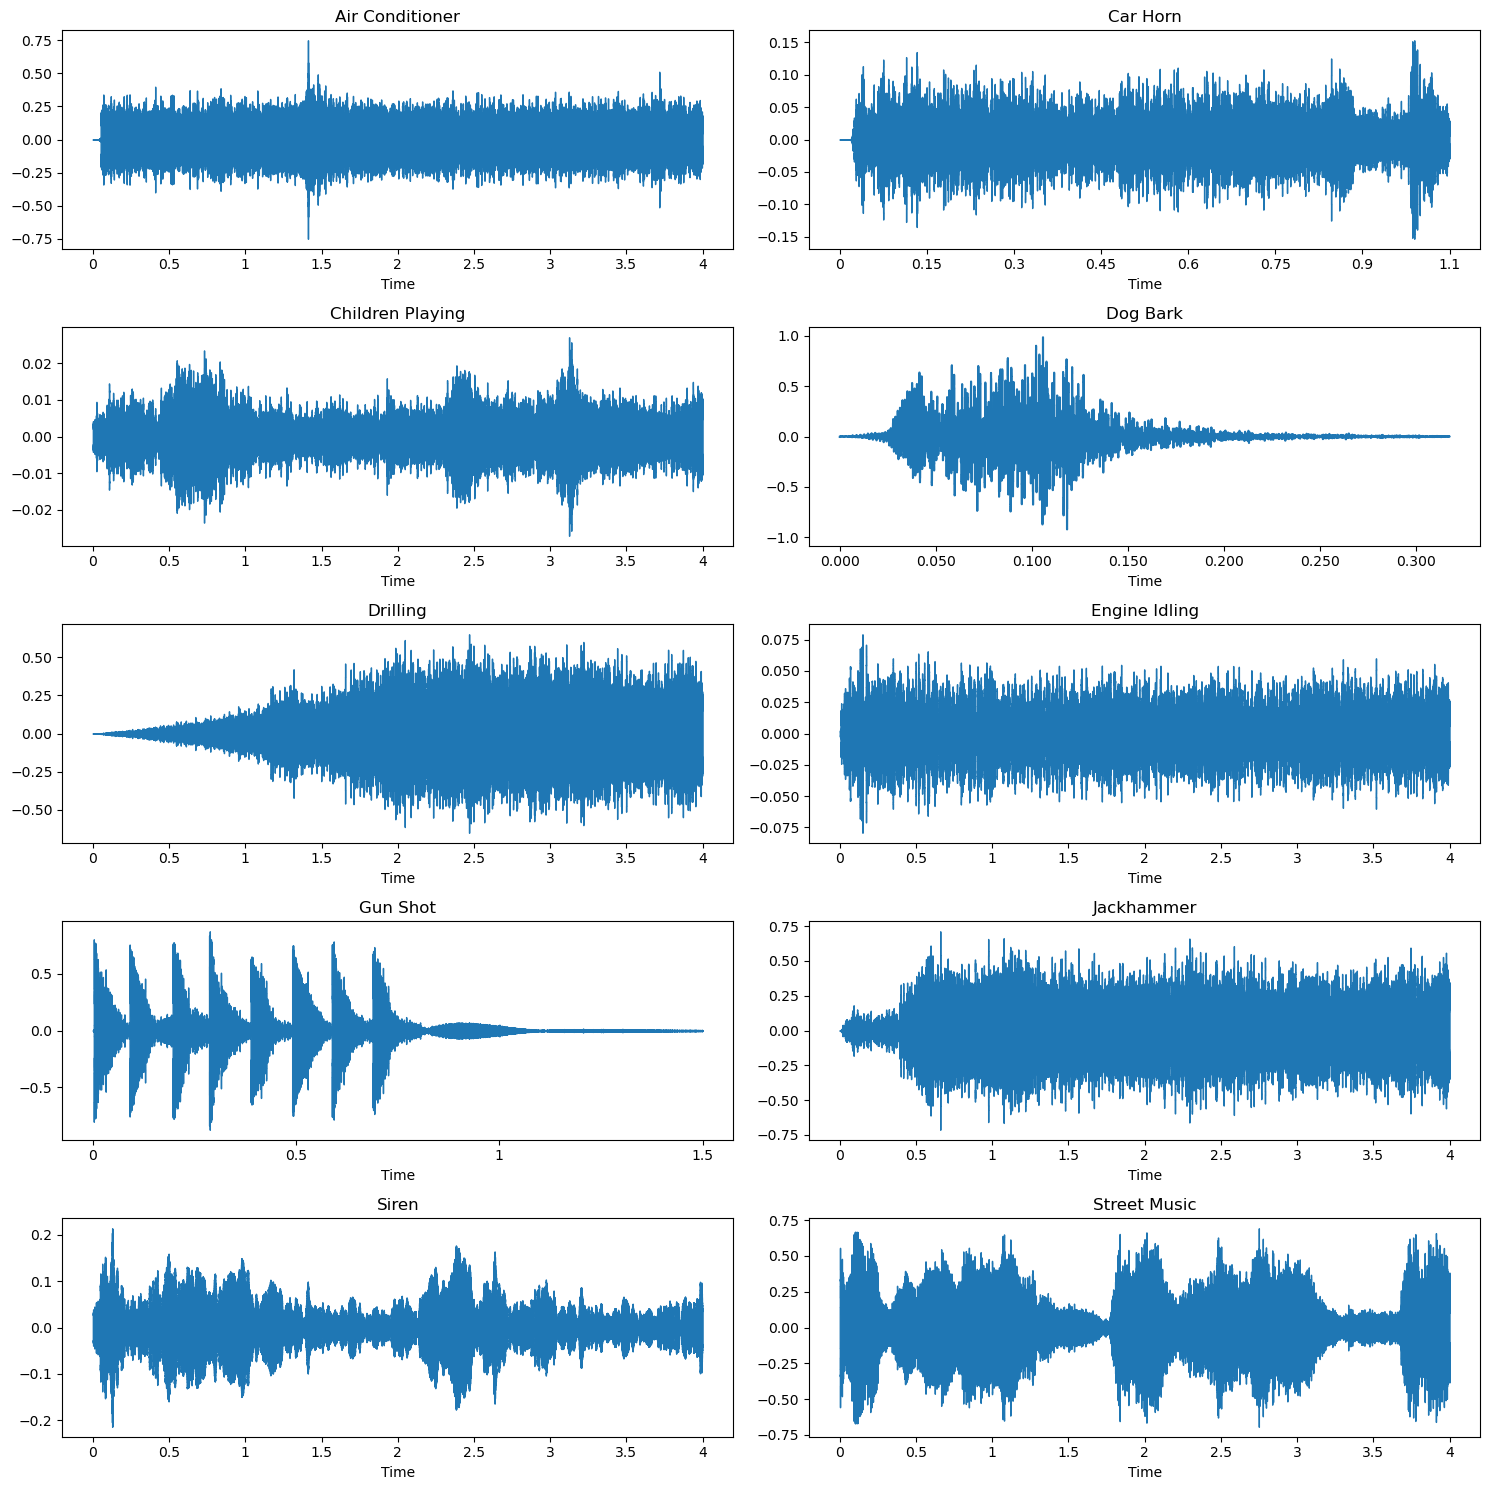

In [6]:
label=['Air Conditioner','Car Horn','Children Playing','Dog Bark','Drilling','Engine Idling','Gun Shot','Jackhammer','Siren','Street Music']
fig=plt.subplots(5,2,figsize=(15,15))
for i in range(10):
    plt.subplot(5,2,i+1)
    wave,sample_rate=librosa.load(r'D:\projects\Deep learning\Audio classification\UrbanSound8K\example\{}.wav'.format(i))
    librosa.display.waveshow(wave,sr=sample_rate)
    plt.title(label[i])

plt.tight_layout()
plt.show

Here, wave represent the array consisting of amplitutdes of the wave as a floating point time series, and sample rate is the number of audio signals taken per second and in library librosa it automatically adjust the audio to have the sample rate of 22050 that is approximately 22khz.

<function matplotlib.pyplot.show(close=None, block=None)>

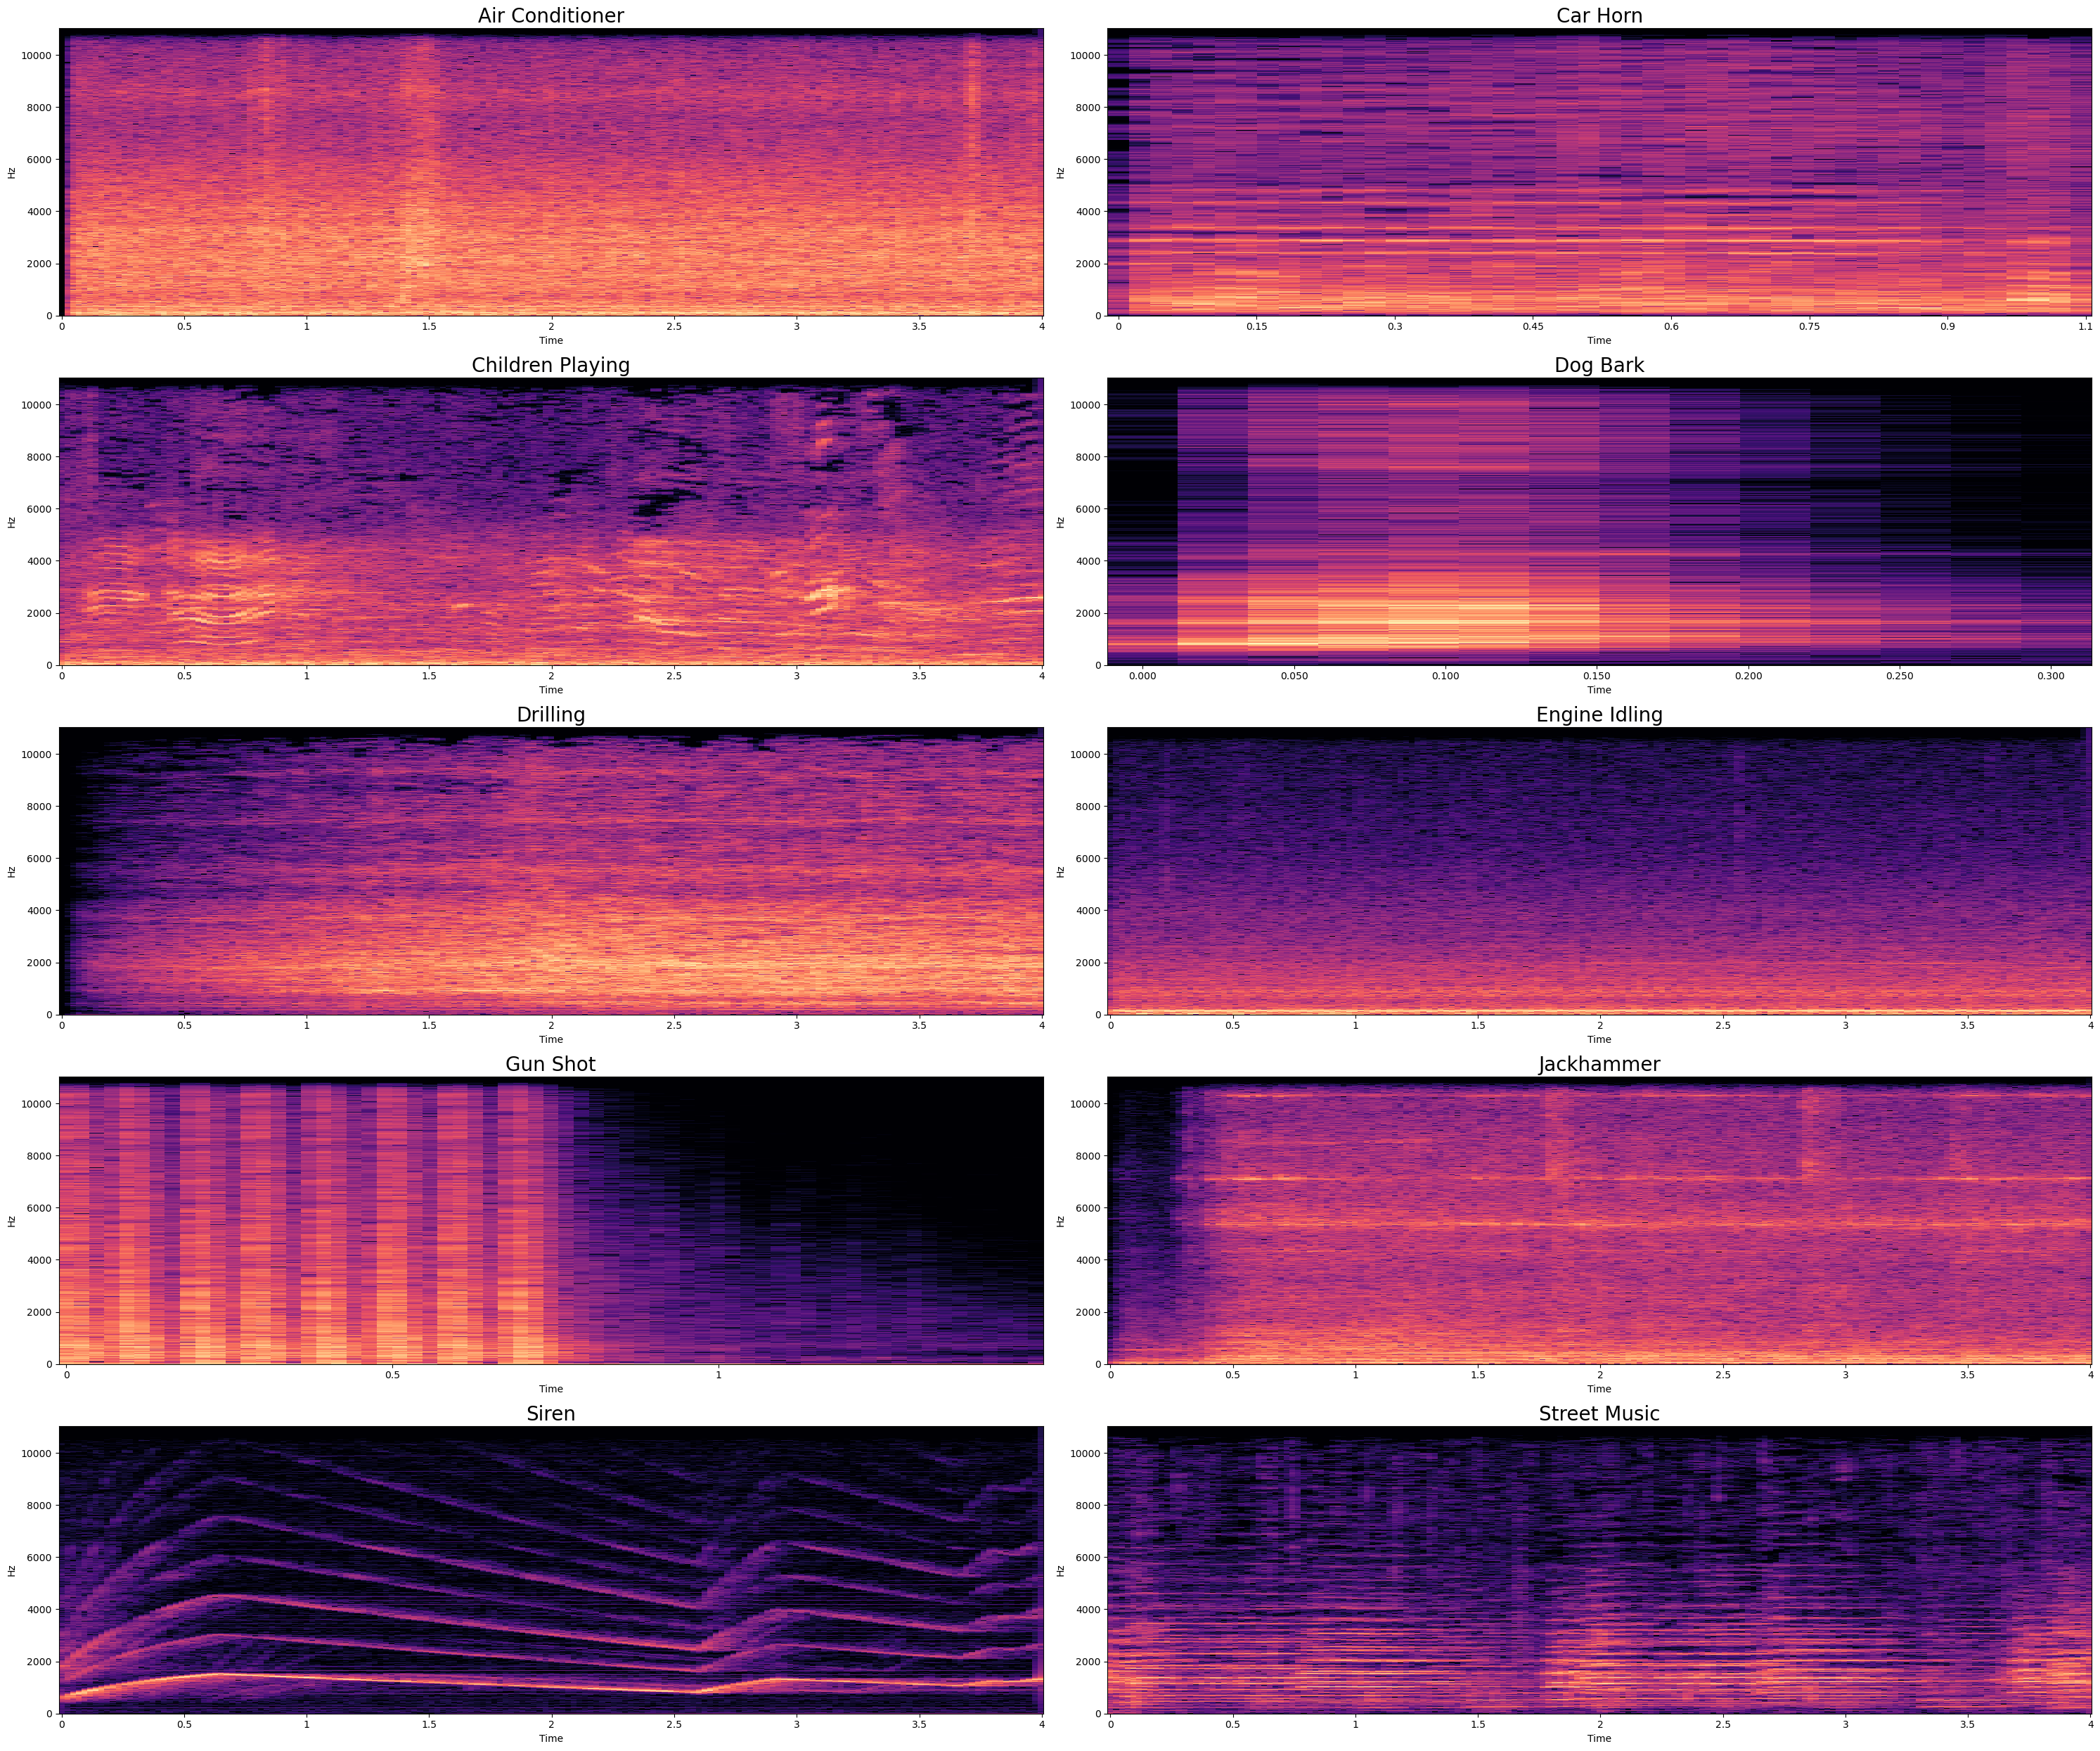

In [7]:
fig=plt.subplots(5,2,figsize=(30,25))
for i in range(10):
    plt.subplot(5,2,i+1)
    wave,sample_rate=librosa.load(r'D:\projects\Deep learning\Audio classification\UrbanSound8K\example\{}.wav'.format(i))
    D = np.abs(librosa.stft(wave))
    db = librosa.amplitude_to_db(D,ref=np.max)
    librosa.display.specshow(db,sr=sample_rate,x_axis='time',y_axis='hz')
    plt.title(label[i],fontsize=20)

plt.tight_layout()
plt.show

Above diagrams are known as spectogram where spectogram is a visual representation of the spectrum of frequencies of a signal (here sound wave signal) as it varies with respect to time.

Now, let us load an audio file 

In [8]:
ipd.Audio(r'D:\projects\Deep learning\Audio classification\UrbanSound8K\example\5.wav')

**Data Preprocessing**

We will define a function to extract features from the audio files. Here, we use Mel-Frequency Cepstral Coefficients (MFCCs), which are commonly used in audio classification tasks.

In [9]:
def feature_extraction(file_loc):
    y,srate=librosa.load(file_loc)
    mfccs_features=librosa.feature.mfcc(y=y,sr=srate,n_mfcc=42)
    mfcc_scaled=np.mean(mfccs_features.T,axis=0)

    return mfcc_scaled

Creating a new column which contains the location of the file in the directory.

In [10]:
dt['loc']=dt.apply(lambda row: r'D:\projects\Deep learning\Audio classification\UrbanSound8K\audio\fold{}\{}'.format(row['fold'],row['slice_file_name']),axis=1)

Now, Creating a column containing the extracted fetures 

In [11]:
dt['features']=""
for i in range(len(dt['loc'])):
    dt['features'][i]=feature_extraction(dt['loc'][i])

Splitting the data into target feature and independent featured

In [12]:
X=np.array(dt['features'].tolist())
y=pd.get_dummies(dt['class'],dtype=int).values

Splitting the Dataset to train set and test set

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=24)

In [14]:
X_train.shape

(6112, 42)

In [15]:
X_test.shape

(2620, 42)

In [16]:
y_train.shape

(6112, 10)

**Creating the model**

We define a Sequential model using Keras, which consists of multiple layers. This model is a fully connected feedforward neural network.

In [17]:
model=Sequential()

# Adding input layer
model.add(Dense(100,activation='relu',input_shape=(42,)))

# Adding Hidden layer
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(150,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100,activation='relu'))
model.add(Dropout(0.1))

# Adding output layer
model.add(Dense(y.shape[1],activation='softmax'))

Now, let us see the summary of what our neural network is.

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          15,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,210 (227.38 KB)

 Trainable params: 58,210 (227.38 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

model.fit(X_train,y_train,epochs=1000,batch_size=32,validation_data=(X_test,y_test),callbacks=early_stopping)

Epoch 1/1000
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2031 - loss: 4.8718 - val_accuracy: 0.4683 - val_loss: 1.6244
Epoch 2/1000
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4371 - loss: 1.6480 - val_accuracy: 0.5592 - val_loss: 1.2950
Epoch 3/1000
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5166 - loss: 1.4045 - val_accuracy: 0.6542 - val_loss: 1.0830
Epoch 4/1000
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5959 - loss: 1.1984 - val_accuracy: 0.6714 - val_loss: 0.9807
Epoch 5/1000
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6384 - loss: 1.0544 - val_accuracy: 0.6798 - val_loss: 0.9574
Epoch 6/1000
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6741 - loss: 0.9655 - val_accuracy: 0.7309 - val_loss: 0.8205
Epoch 7/1000
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7118 - loss: 0.8923 - val_accuracy: 0.7523 - val_loss: 0.7687
Epoch 8/1000
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7236 - loss: 0.8100 - 

In [20]:
score=model.evaluate(X_test,y_test,verbose=1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8976 - loss: 0.3747


In [21]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.3846738636493683
Test accuracy: 0.8946564793586731


We achieved a certain accuracy on the test data, which indicates the model's performance in classifying the audio samples. The loss provides insight into the model's error rate.

**Now, let us check the model on the dataset that we have created for example containing the sample audio from each class.**

We will now test the model using example audio files from each class. These examples were used previously for visualization.

In [22]:
X_example=[]
for i in range(10):
    ex_loc=r'D:\projects\Deep learning\Audio classification\UrbanSound8K\example\{}.wav'.format(i)
    X_example.append(feature_extraction(ex_loc))  

In [23]:
X_example=np.array(X_example)
pred=np.argmax(model.predict(X_example),axis=1)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array([0, 1, 2, 3, 4, 5, 9, 7, 8, 9], dtype=int64)

We have already made an array which consists of all the classes name in order. We will use that array to name the predict class to find if the predict class matches or not. The dataset is also taken in same order as class.

In [24]:
pred_label=[]
for i in range(10):
    pred_label.append(label[pred[i]])

In [25]:
print(pred_label)
print(label)

['Air Conditioner', 'Car Horn', 'Children Playing', 'Dog Bark', 'Drilling', 'Engine Idling', 'Street Music', 'Jackhammer', 'Siren', 'Street Music']
['Air Conditioner', 'Car Horn', 'Children Playing', 'Dog Bark', 'Drilling', 'Engine Idling', 'Gun Shot', 'Jackhammer', 'Siren', 'Street Music']


Here. we can see that only one class out of ten is not correctly predicted.

**Conclusion**

In conclusion, this audio classification project demonstrates the effective use of deep learning techniques to categorize urban soundscapes using the UrbanSound8K dataset. By employing Mel-Frequency Cepstral Coefficients (MFCCs) for feature extraction and constructing a neural network model, we achieved a promising accuracy in classifying various urban sounds. This project underscores the potential of audio classification for practical applications such as environmental monitoring and smart city development. While the model performs well, there are opportunities for further enhancement through data augmentation and exploring advanced neural network architectures. Overall, this project provides a solid foundation for future research and development in audio analysis and classification.
